#📌 Extracción

In [1504]:
url = "https://raw.githubusercontent.com/DanielDiazLeivaDDL/DanielDiazLeivaDDL-challenge3-data-science-LATAM/main/df_limpio.csv"

import pandas as pd
datos = pd.read_csv(url)


datos.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ChargesDaily
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#🔭Análisis Exploratorio

In [1505]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [1506]:
for col in datos.columns:
    print(f'{col}: {pd.unique(datos[col])}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' nan]
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: [1 0]
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Ba

##Datos Categoricos

In [1507]:
from enum import auto
import plotly.express as px

px.histogram(datos, x='Churn',text_auto=True)

In [1508]:
px.histogram(datos, x='gender',text_auto=True)

In [1509]:
px.histogram(datos, x='InternetService',text_auto=True, color='Churn', barmode='group')

In [1510]:
px.histogram(datos, x='PaymentMethod',text_auto=True, color='Churn', barmode='group')

##Datos Numericos

In [1511]:
px.box(datos, x='tenure', color='Churn')

In [1512]:
px.box(datos, x='Charges.Monthly', color='Churn')

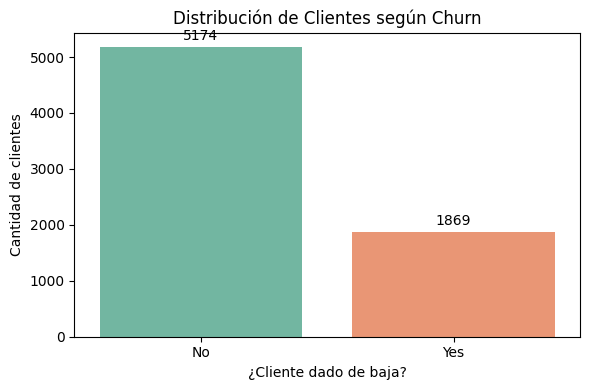

In [1513]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=datos, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribución de Clientes según Churn')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cantidad de clientes')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


#🔧 Transformación

In [1514]:
datos_nuevo = datos[datos['Churn'].notna()]
datos_nuevo = datos_nuevo.drop(['customerID'], axis=1)
datos_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  
 17  

In [1515]:
datos_nuevo.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ChargesDaily
0,No,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,No,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


##*Correlacion Churn y Tenure*

In [1516]:
datos_corr = datos_nuevo
for col in datos_corr.columns:
    print(f'{col}: {pd.unique(datos_corr[col])}')

Churn: ['No' 'Yes']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService: [1 0]
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges.Total: [

In [1517]:

cols_categoricas = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]


df_encoded = datos_corr.copy()


df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})
df_encoded['gender'] = df_encoded['gender'].map({'Female': 0, 'Male': 1})


df_encoded = pd.get_dummies(df_encoded, columns=cols_categoricas, drop_first=True)


print(df_encoded.head())


corr_matrix = df_encoded.corr(numeric_only=True)
print(corr_matrix[['Churn', 'tenure']])



   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       0              0        1           1       9             1   
1      0       1              0        0           0       9             1   
2      1       1              0        0           0       4             1   
3      1       1              1        1           0      13             1   
4      1       0              1        1           0       3             1   

   PaperlessBilling  Charges.Monthly  Charges.Total  ...  TechSupport_Yes  \
0                 1             65.6         593.30  ...             True   
1                 0             59.9         542.40  ...            False   
2                 1             73.9         280.85  ...            False   
3                 1             98.0        1237.85  ...            False   
4                 1             83.9         267.40  ...             True   

   StreamingTV_No internet service  StreamingTV_Yes  \
0            

#*OneHotEncoder*

In [1518]:
#se descartan los cargo anuales y diarios por ser redundantes, y comolos servicios se cobran mensualmente, es ma relevante mantener el mensual, dsarta gender por tener un correlacion muy baja ademas de que los servicios de telecumnicaciones no deben ni puedes discrimanr por genero
y = datos_nuevo['Churn']
X = datos_nuevo.drop(['Churn','ChargesDaily','Charges.Total','gender'], axis=1)
y = datos_nuevo['Churn']


In [1519]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [1520]:
datos_nuevo.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'ChargesDaily'],
      dtype='object')

In [1521]:
columnas = X.columns
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), [ 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']), remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

In [1522]:
X = one_hot.fit_transform(X)

In [1523]:
one_hot.get_feature_names_out(columnas)


array(['onehotencoder__SeniorCitizen_1', 'onehotencoder__Partner_1',
       'onehotencoder__Dependents_1', 'onehotencoder__PhoneService_1',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes'

In [1524]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#🏗️Construccion de Modelos

#*Baseline*

In [1525]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, stratify=y_train_val, random_state=42)


###*DUMMY*

In [1526]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print(dummy_clf.score(X_test, y_test))
print(dummy_clf.score(X_val,y_val))

0.73450070989115
0.7349560513860717


#*Evaluacion modelo dummy*

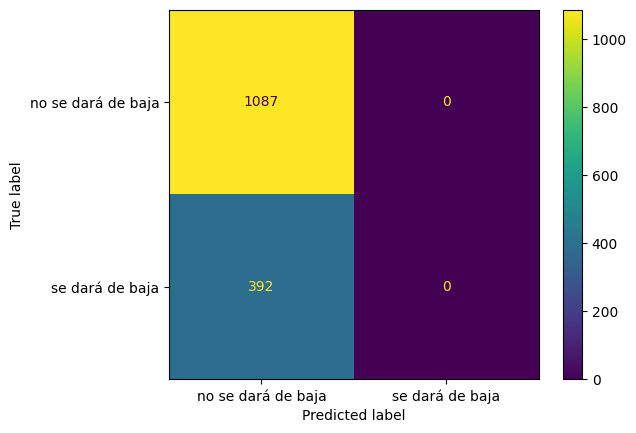

In [1527]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_previsto = dummy_clf.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

In [1528]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(precision_score(y_val,y_previsto))
print(recall_score(y_val,y_previsto))
print(accuracy_score(y_val,y_previsto))

print(f1_score(y_val,y_previsto))


0.0
0.0
0.7349560513860717
0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



#*Arbol de desciciones*

In [1529]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=42,max_depth=10)
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [1530]:
modelo_arbol.score(X_test, y_test)

0.7477520113582584

In [1531]:
modelo_arbol.score(X_val, y_val)

0.7640297498309668

In [1532]:
modelo_arbol.score(X_train, y_train)

0.8864097363083164

In [1533]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [1534]:
 valores_columnas =  [
    'gender_Male', 'SeniorCitizen_1', 'Partner_1', 'Dependents_1',
    'PhoneService_1', 'MultipleLines_No', 'MultipleLines_No phone service',
    'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
    'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service',
    'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service',
    'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service',
    'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service',
    'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service',
    'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service',
    'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
    'Contract_Two year', 'PaperlessBilling_1', 'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 'tenure', 'Charges.Monthly', 'Charges.Total',
    'ChargesDaily'
]


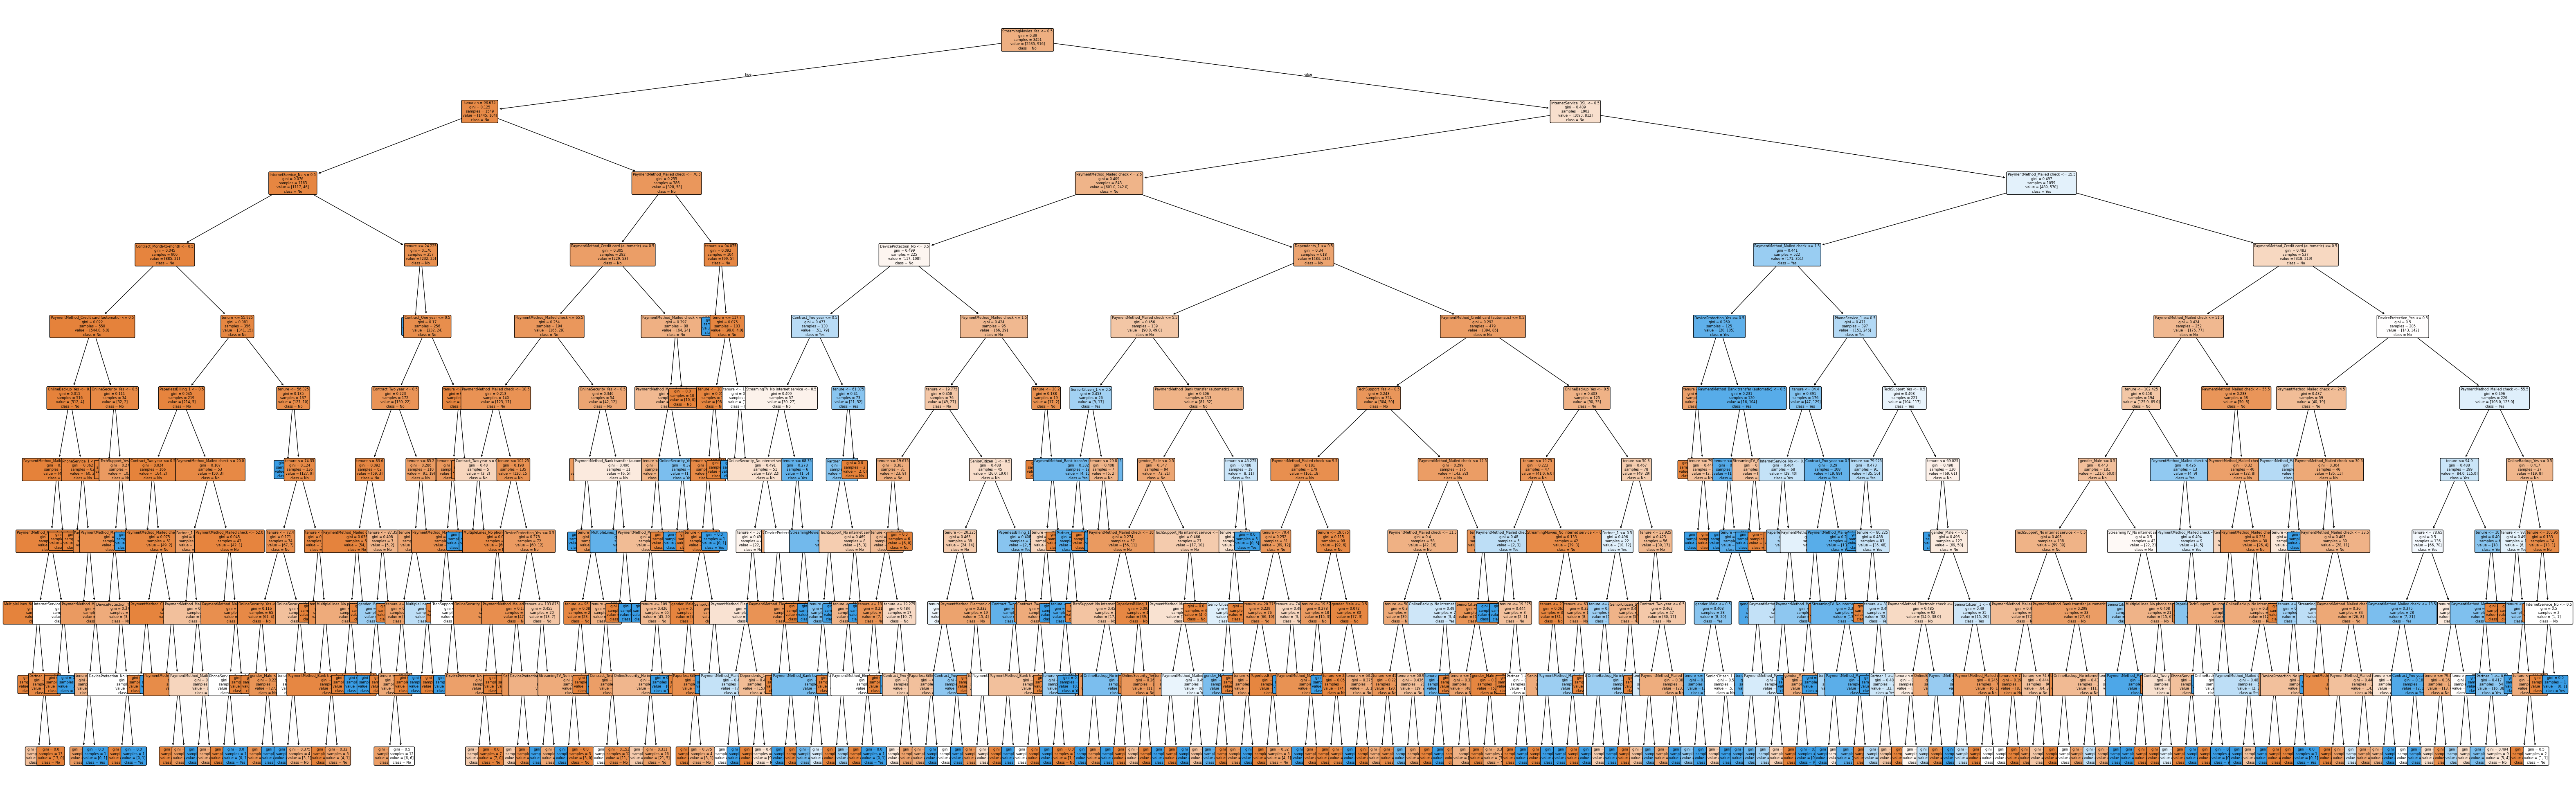

In [1535]:
plt.figure(figsize=(80, 25))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Yes'], fontsize=6, feature_names=valores_columnas, rounded=True)
plt.show()

##*Scoring preliminar*

In [1536]:
modelo_arbol.score(X_train, y_train)

0.8864097363083164

In [1537]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [1538]:
modelo_arbol.score(X_train, y_train)

0.7867284844972472

In [1539]:
modelo_arbol.score(X_test, y_test)

0.7884524372929484

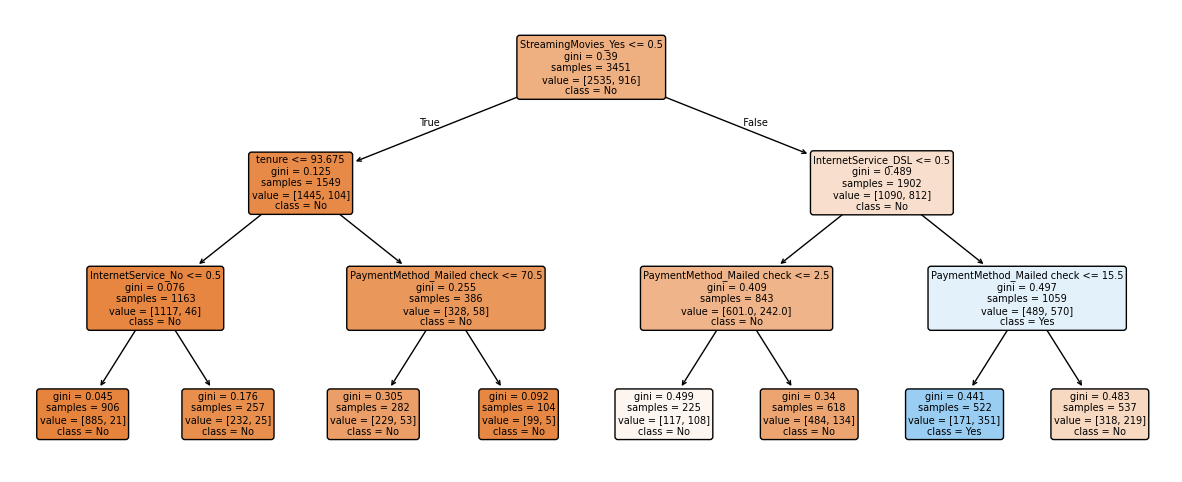

In [1540]:
plt.figure(figsize=(15, 6))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Yes'], fontsize=7, feature_names=valores_columnas, rounded=True)
plt.show()

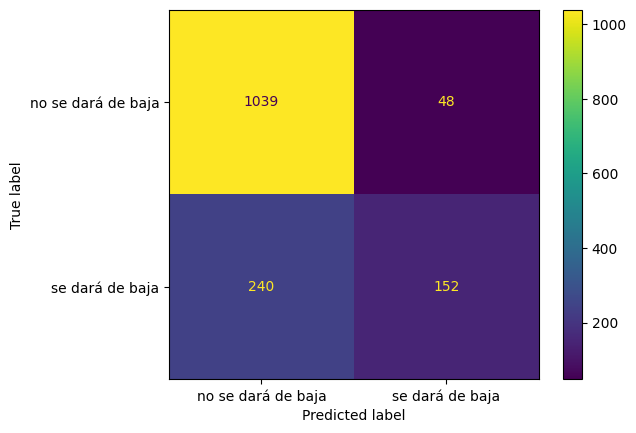

In [1541]:

y_previsto = modelo_arbol.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

###*Evaluación del Modelo de Arbol*

In [1542]:

print(f'Precision : {precision_score(y_val,y_previsto)}')
print(f'Recall : {recall_score(y_val,y_previsto)}')
print(f'Accuracy: {accuracy_score(y_val,y_previsto)}')

print(f'F1 : {f1_score(y_val,y_previsto)}')

Precision : 0.76
Recall : 0.3877551020408163
Accuracy: 0.8052738336713996
F1 : 0.5135135135135135


In [1543]:
from sklearn.metrics import roc_auc_score

print(f'El area bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El area bajo la curva ROC es: 0.6717984341850816


In [1544]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1087
           1       0.76      0.39      0.51       392

    accuracy                           0.81      1479
   macro avg       0.79      0.67      0.70      1479
weighted avg       0.80      0.81      0.78      1479



###*Validacion cruzada Estraitificada*

In [1545]:

from sklearn.model_selection import  StratifiedKFold,KFold,cross_validate

modelo = DecisionTreeClassifier(max_depth=10, random_state=42)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(modelo,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.02449417, 0.02343154, 0.02308106, 0.02355361, 0.02589512]),
 'score_time': array([0.00255132, 0.00246072, 0.00240159, 0.00243592, 0.00388026]),
 'test_score': array([0.56417112, 0.53743316, 0.54010695, 0.57640751, 0.52673797])}

In [1546]:
cv_resultados['test_score']

array([0.56417112, 0.53743316, 0.54010695, 0.57640751, 0.52673797])

In [1547]:
def intervalo_confianza(res):
    promedio  = res['test_score'].mean()
    des_std   = res['test_score'].std()
    lim_inf   = promedio - 2*des_std
    lim_sup   = min(promedio + 2*des_std, 1)  # evita pasar de 1
    return f"El intervalo es: [{lim_inf:.3f}, {lim_sup:.3f}]"


intervalo_confianza(cv_resultados)



'El intervalo es: [0.512, 0.586]'

##*Balanceo de Datos*

###*OverSampling*

In [1548]:
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state=42)
x_balan,y_balan = OS.fit_resample(X,y)



In [1549]:
import numpy as np

valores, cuentas = np.unique(y_balan, return_counts=True)
print("Valores:", valores)
print("Frecuencias:", cuentas)
print("Porcentajes:", cuentas / len(y_balan) * 100)


Valores: [0 1]
Frecuencias: [5174 5174]
Porcentajes: [50. 50.]


In [1550]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(pipeline,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.06720853, 0.06495476, 0.06895065, 0.06768584, 0.06857991]),
 'score_time': array([0.0033462 , 0.00371647, 0.00381708, 0.00337315, 0.00354242]),
 'test_score': array([0.59625668, 0.63903743, 0.61229947, 0.51474531, 0.59090909])}

In [1551]:
intervalo_confianza(cv_resultados)

'El intervalo es: [0.508, 0.674]'

###*UnderSampling*

In [1552]:
from imblearn.under_sampling import NearMiss



In [1553]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(pipeline,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.07812142, 0.07612371, 0.07423043, 0.07492924, 0.07522631]),
 'score_time': array([0.00354171, 0.00335145, 0.00329447, 0.0033021 , 0.0030992 ]),
 'test_score': array([0.6684492 , 0.57754011, 0.59893048, 0.60857909, 0.57486631])}

In [1554]:
intervalo_confianza(cv_resultados)

'El intervalo es: [0.538, 0.673]'

##Scoring definitivo de Arbol

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1552
           1       0.64      0.69      0.66       561

    accuracy                           0.81      2113
   macro avg       0.76      0.77      0.77      2113
weighted avg       0.82      0.81      0.82      2113



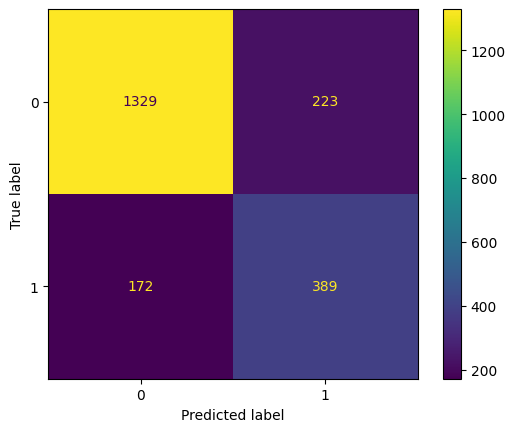

In [1555]:
OS = SMOTE()
x_balan,y_balan = OS.fit_resample(X,y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balan,y_balan)
y_previsto = modelo.predict(X_test)


print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);


#*Normalizacion*

In [1556]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)


#*KNN*

In [1557]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [1558]:
X_test_norm = norm.transform(X_test)
modelo_knn.score(X_test_norm, y_test)

0.7595835305253195

In [1559]:
modelo_knn.score(X_val_norm, y_val)


0.7640297498309668

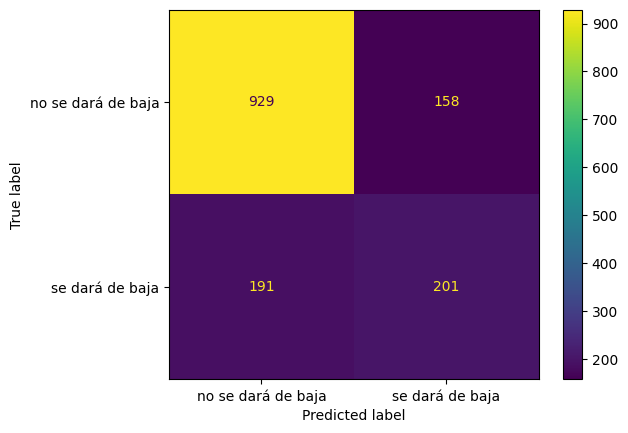

In [1560]:

y_previsto = modelo_knn.predict(X_val_norm)
matriz_confusion = confusion_matrix(y_val,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

In [1561]:

print(f'Precision : {precision_score(y_val,y_previsto)}')
print(f'Recall : {recall_score(y_val,y_previsto)}')
print(f'Accuracy: {accuracy_score(y_val,y_previsto)}')

print(f'F1 : {f1_score(y_val,y_previsto)}')

Precision : 0.5598885793871866
Recall : 0.5127551020408163
Accuracy: 0.7640297498309668
F1 : 0.5352862849533955


In [1562]:
#Importo todo por uncuestion de comodidad, para no tener que ejecutar todo cada vez

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
import numpy as np

In [1563]:
print(f'Accuracy en validación: {modelo_knn.score(X_val_norm, y_val):.3f}')
print(f'Accuracy en test: {modelo_knn.score(X_test_norm, y_test):.3f}')

Accuracy en validación: 0.764
Accuracy en test: 0.760


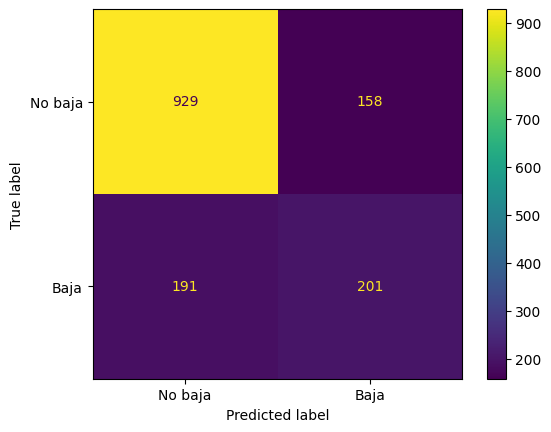

In [1564]:
y_val_pred = modelo_knn.predict(X_val_norm)
matriz_confusion = confusion_matrix(y_val, y_val_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,
                             display_labels=['No baja', 'Baja'])
vis.plot()

##*Validación cruzada estratificada sin muestreo*

In [1565]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline_knn = imbpipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

cv_resultados = cross_validate(pipeline_knn, X_train_val, y_train_val, cv=skf, scoring='recall')

print(intervalo_confianza(cv_resultados))

El intervalo es: [0.476, 0.540]


##*Balanceo con SMOTE (oversampling) + validación cruzada*

In [1566]:
pipeline_smote = imbpipeline([
    ('scaler', MinMaxScaler()),
    ('oversample', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

cv_resultados_smote = cross_validate(pipeline_smote, X_train_val, y_train_val, cv=skf, scoring='recall')

print("Con SMOTE (oversampling):")
print(intervalo_confianza(cv_resultados_smote))

Con SMOTE (oversampling):
El intervalo es: [0.659, 0.743]


##*Balanceo con Undersampling + validación cruzada*

In [1567]:
pipeline_under = imbpipeline([
    ('scaler', MinMaxScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('knn', KNeighborsClassifier())
])

cv_resultados_under = cross_validate(pipeline_under, X_train_val, y_train_val, cv=skf, scoring='recall')

print("Con Undersampling:")
print(intervalo_confianza(cv_resultados_under))

Con Undersampling:
El intervalo es: [0.741, 0.826]


##*Scoring Definitivo KNN*

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1552
           1       0.52      0.83      0.64       561

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



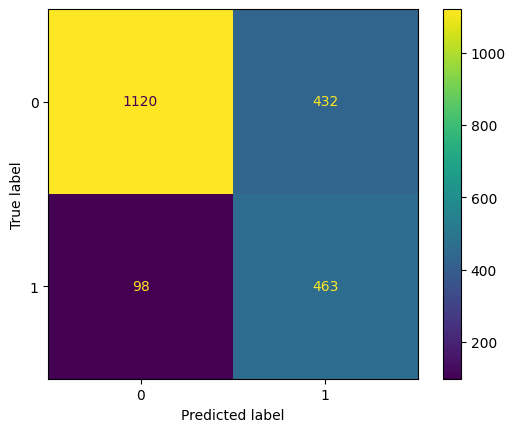

In [1568]:
US = RandomUnderSampler()
x_reduc, y_reduc = US.fit_resample(X, y)


modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_reduc, y_reduc)

y_previsto = modelo_knn.predict(X_test)


print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

#*Modelo Campeon*

=== Árbol con SMOTE ===
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1552
           1       0.52      0.56      0.54       561

    accuracy                           0.75      2113
   macro avg       0.68      0.69      0.68      2113
weighted avg       0.75      0.75      0.75      2113

Accuracy: 0.7463

=== KNN con Undersampling ===
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1552
           1       0.46      0.78      0.58       561

    accuracy                           0.70      2113
   macro avg       0.67      0.72      0.67      2113
weighted avg       0.78      0.70      0.71      2113

Accuracy: 0.6962

🏆 Modelo campeón: Árbol con SMOTE


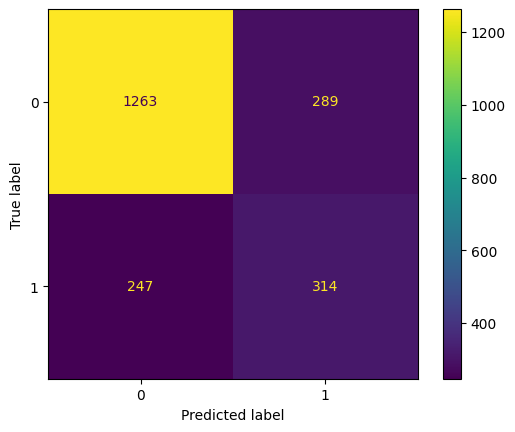

In [1569]:


# Modelo Árbol con SMOTE
OS = SMOTE(random_state=42)
X_balan, y_balan = OS.fit_resample(X_train, y_train)
modelo_arbol = DecisionTreeClassifier(max_depth=10)
modelo_arbol.fit(X_balan, y_balan)
y_pred_arbol = modelo_arbol.predict(X_test)
acc_arbol = accuracy_score(y_test, y_pred_arbol)
print("=== Árbol con SMOTE ===")
print(classification_report(y_test, y_pred_arbol))
print(f"Accuracy: {acc_arbol:.4f}")

# Modelo KNN con Undersampling
US = RandomUnderSampler(random_state=42)
X_under, y_under = US.fit_resample(X_train, y_train)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_under, y_under)
y_pred_knn = modelo_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("\n=== KNN con Undersampling ===")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {acc_knn:.4f}")

# Elección del campeón según accuracy
if acc_arbol > acc_knn:
    print("\n🏆 Modelo campeón: Árbol con SMOTE")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_arbol)
else:
    print("\n🏆 Modelo campeón: KNN con Undersampling")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)


In [1570]:
import pickle

with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [1571]:
with open('modelo_campeon.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [1572]:


nuevo_cliente = pd.DataFrame([{
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'PhoneService': 1,
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 1,
    'PaymentMethod': 'Electronic check',
    'tenure': 5,
    'Charges.Monthly': 79.5,
    'Charges.Total': 397.5,
    'ChargesDaily': 2.65
}])
nuevo_cliente

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,Charges.Monthly,Charges.Total,ChargesDaily
0,Male,0,1,0,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,5,79.5,397.5,2.65


In [1573]:
modelo_one_hot = pd.read_pickle('modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('modelo_campeon.pkl')

In [1574]:
nuevo_cliente = modelo_one_hot.transform(nuevo_cliente)

In [1575]:
modelo_arbol.predict(nuevo_cliente)

array([1])

In [1576]:
modelo_arbol.predict_proba(nuevo_cliente)

array([[0.12437811, 0.87562189]])

#📊 Carga y análisis

#📄Informe final